# Pandas: Distributions & Testing

- [Distributions in Pandas](#dist)
- [Hypothesis Testing](#testing)

<div id="dist" />

## Distributions in Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
np.random.binomial(1, 0.5)

1

In [3]:
np.random.binomial(1000, 0.5)/1000

0.526

In [4]:
x = np.random.binomial(20, .5, 100)
print(x)
print((x>=15).mean()) # Display %

[10  9 11  9 10 13 10  9 12 11 10 13 12 11 16 12 10 10 10 12  8  6  9  8
  7 12  9 11  8 10 15 16 10  5  6 11 14 10  8 11  8  7  5 10 11 11 10  9
  9 10  9 10 15  9 11  8 13 10 10  7  7 13 12 12 11  7 12  9 12  7  8  8
 10 10 11 12 10 10  8 10 13 13 10 11 14  7 12 10 13  8 13 10  7  7 15  9
 10 12 12 10]
0.05


In [5]:
chance_of_tornado = 0.01/100
np.random.binomial(100000, chance_of_tornado)

9

In [6]:
chance_of_tornado = 0.01

tornado_events = np.random.binomial(1, chance_of_tornado, 1000000)
    
two_days_in_a_row = 0
for j in range(1,len(tornado_events)-1):
    if tornado_events[j]==1 and tornado_events[j-1]==1:
        two_days_in_a_row+=1

print("{} tornadoes back to back in {} years".format(two_days_in_a_row, 1000000/365))

129 tornadoes back to back in 2739.72602739726 years


In [7]:
np.random.uniform(0, 1)

0.8567343588559845

In [8]:
np.random.normal(0.75)

1.8627675996587865

Formula for standard deviation
$$\sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2}$$

In [9]:
distribution = np.random.normal(0.75,size=1000)

np.sqrt(np.sum((np.mean(distribution)-distribution)**2)/len(distribution)) # Standard desviation

0.9352656231517661

In [10]:
np.std(distribution) # standard desviation with numpy function

0.9352656231517661

In [11]:
import scipy.stats as stats

kurtosis = stats.kurtosis(distribution)
print("Kurtosis value: ", kurtosis)
# kurtosis tell us how different is the distribution from a normal distribution
# = -1 -> distribution is more flat
# = +1 -> distribution is more peacky

Kurtosis value:  -0.2314610380187645


Skew tell us if the peak of the curve is one way or the other

In [12]:
# Skew tell us if the peak of the curve is one way or the other
skew = stats.skew(distribution)
print("Skew value: ", skew)

Skew value:  -0.08665319294962641


In [13]:
chi_squared_df2 = np.random.chisquare(2, size=10000)
skew = stats.skew(chi_squared_df2)
print("Skew value: ", skew)

Skew value:  1.9456381463860688


In [14]:
chi_squared_df5 = np.random.chisquare(5, size=10000)
skew = stats.skew(chi_squared_df5)
print("Skew value: ", skew)

Skew value:  1.2899295636780408


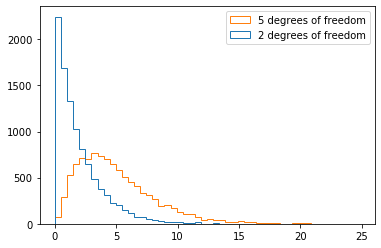

In [15]:
output = plt.hist([chi_squared_df2,chi_squared_df5], 
                  bins=50, 
                  histtype="step", 
                  label=["2 degrees of freedom", "5 degrees of freedom"])
plt.legend(loc="upper right")

<div id="testing" />

## Hypothesis Testing

In [16]:
df = pd.read_csv("../data/grades.csv")

In [17]:
df.head()

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.512541,2016-01-09 05:36:02.389000000,85.512541,2016-01-09 06:39:44.416000000,68.410033,2016-01-15 20:22:45.882000000,54.728026,2016-01-11 12:41:50.749000000,49.255224,2016-01-11 17:31:12.489000000,44.329701,2016-01-17 16:24:42.765000000
3,FFDF2B2C-F514-EF7F-6538-A6A53518E9DC,86.030665,2016-04-30 06:50:39.801000000,68.824532,2016-04-30 17:20:38.727000000,61.942079,2016-05-12 07:47:16.326000000,49.553663,2016-05-07 16:09:20.485000000,49.553663,2016-05-24 12:51:18.016000000,44.598297,2016-05-26 08:09:12.058000000
4,5ECBEEB6-F1CE-80AE-3164-E45E99473FB4,64.813800,2015-12-13 17:06:10.750000000,51.491040,2015-12-14 12:25:12.056000000,41.932832,2015-12-29 14:25:22.594000000,36.929549,2015-12-28 01:29:55.901000000,33.236594,2015-12-29 14:46:06.628000000,33.236594,2016-01-05 01:06:59.546000000


In [18]:
len(df)

2315

In [19]:
early = df[df["assignment1_submission"] <= "2015-12-31"]
late = df[df["assignment1_submission"] > "2015-12-31"]

In [20]:
early.mean()

assignment1_grade    74.972741
assignment2_grade    67.252190
assignment3_grade    61.129050
assignment4_grade    54.157620
assignment5_grade    48.634643
assignment6_grade    43.838980
dtype: float64

In [21]:
late.mean()

assignment1_grade    74.017429
assignment2_grade    66.370822
assignment3_grade    60.023244
assignment4_grade    54.058138
assignment5_grade    48.599402
assignment6_grade    43.844384
dtype: float64

In [22]:
from scipy import stats
stats.ttest_ind?

In [23]:
stats.ttest_ind(early["assignment1_grade"], late["assignment1_grade"])

# We assume pvalue = alpha = 0.05

# Results: pvalue > 0.05 so we can"t reject the null hypothesis which is that the two populations are the same
# We can say that there"s no statistically significant difference between these two sample means.

Ttest_indResult(statistic=1.400549944897566, pvalue=0.16148283016060577)

In [24]:
stats.ttest_ind(early["assignment2_grade"], late["assignment2_grade"])

Ttest_indResult(statistic=1.3239868220912567, pvalue=0.18563824610067967)

In [25]:
stats.ttest_ind(early["assignment3_grade"], late["assignment3_grade"])

Ttest_indResult(statistic=1.7116160037010733, pvalue=0.08710151634155668)